In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient
import numpy as np

In [122]:
client = MongoClient("mongodb://localhost:27017/")
db = client.solar_irradiation_fogserver
collection = db.sensors
data = pd.DataFrame(list(collection.find()))

In [123]:
data.shape

(61200, 8)

In [124]:
data.head()

,_id,datacenter,farm,sensor,datetime,radiation_src,outlier,radiation
0,62c3887e6444843c75c3e110,DataCenter,FogServer01,ap1,2010-03-20 07:30:00,163.045,0,163.045
1,62c3887e6444843c75c3e111,DataCenter,FogServer01,ap3,2010-03-20 07:30:00,161.377,0,161.377
2,62c3887e6444843c75c3e112,DataCenter,FogServer01,ap4,2010-03-20 07:30:00,162.135,0,162.135
3,62c3887e6444843c75c3e113,DataCenter,FogServer01,ap5,2010-03-20 07:30:00,159.488,0,159.488
4,62c3887e6444843c75c3e114,DataCenter,FogServer01,ap6,2010-03-20 07:30:00,163.823,0,163.823


In [125]:
data.dtypes

_id                      object
datacenter               object
farm                     object
sensor                   object
datetime         datetime64[ns]
radiation_src           float64
outlier                   int64
radiation               float64
dtype: object

In [126]:
data.describe()

,radiation_src,outlier,radiation
count,61200.000000,61200.000000,61200.000000
mean,285.776553,0.000180,285.778192
std,74.261128,0.013406,74.246332
min,76.946300,0.000000,76.946300
25%,220.443500,0.000000,220.451000
50%,284.478000,0.000000,284.478000
75%,349.166000,0.000000,349.166000
max,451.237000,1.000000,422.003000


# Deteción de outliers

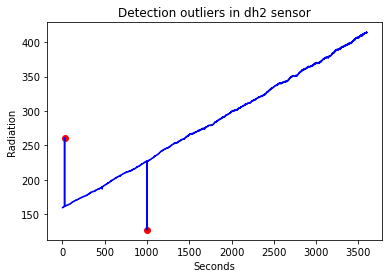

In [133]:
sensor = "dh2"
dap1 = data.query("sensor==@sensor").sort_values(by="datetime", ascending=True)
dap1["seconds"] = np.arange(1, len(dap1)+1)
X = dap1["seconds"]
Y = dap1["radiation_src"]
dap1_outlier = dap1.query("outlier==1")
XO = dap1_outlier["seconds"]
YO = dap1_outlier["radiation_src"]
plt.scatter(XO, YO, c='r')
plt.plot(X, Y, c='b')
plt.xlabel('Seconds')
plt.ylabel('Radiation')
plt.title('Detection outliers in ' + sensor + ' sensor')
plt.savefig('det_' + sensor + '.png')
plt.show()

# Corrección de outliers

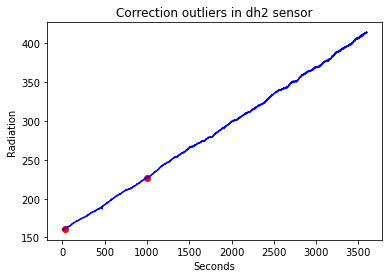

In [134]:
XC = dap1["seconds"]
YC = dap1["radiation"]
XOC = dap1_outlier["seconds"]
YOC = dap1_outlier["radiation"]
plt.scatter(XOC, YOC, c='r')
plt.plot(XC, YC, c='b')
plt.xlabel('Seconds')
plt.ylabel('Radiation')
plt.title('Correction outliers in ' + sensor + ' sensor')
plt.savefig('corr_' + sensor + '.png')
plt.show()